In [12]:
import pandas as pd
from glob import glob
from collections import defaultdict

In [13]:
root = r'C:\Users\gekth\OneDrive\Desktop\ProcessingPlants\benchmark\BenchmarkWin\*'
data_dict = defaultdict(list)

for value in sorted(glob(root)):
    print(value)
    for file in sorted(glob(value + '/*')):
        with open(file, 'r') as file:
            print(file)
            filename = file.name.split('\\')[-2]
            content = file.read()
            times = [int(line.split(': ')[1].split()[0]) for line in content.split('\n') if line.startswith('Time:')]
            for time in times:
                data_dict[filename].append(time)


df_from_dict = pd.DataFrame({k: pd.Series(v) for k, v in data_dict.items()})
df_from_dict = df_from_dict[['test_200000', 'test_400000', 'test_800000', 'test_1600000', 'test_3200000']]
df_from_dict.to_csv('benchmarkWin.csv', index=False)


C:\Users\gekth\OneDrive\Desktop\ProcessingPlants\benchmark\BenchmarkWin\test_1600000
<_io.TextIOWrapper name='C:\\Users\\gekth\\OneDrive\\Desktop\\ProcessingPlants\\benchmark\\BenchmarkWin\\test_1600000\\benchmark_1600000_1.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='C:\\Users\\gekth\\OneDrive\\Desktop\\ProcessingPlants\\benchmark\\BenchmarkWin\\test_1600000\\benchmark_1600000_10.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='C:\\Users\\gekth\\OneDrive\\Desktop\\ProcessingPlants\\benchmark\\BenchmarkWin\\test_1600000\\benchmark_1600000_11.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='C:\\Users\\gekth\\OneDrive\\Desktop\\ProcessingPlants\\benchmark\\BenchmarkWin\\test_1600000\\benchmark_1600000_12.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='C:\\Users\\gekth\\OneDrive\\Desktop\\ProcessingPlants\\benchmark\\BenchmarkWin\\test_1600000\\benchmark_1600000_13.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='C:\\Users\\gekth\\OneDrive\\Des

In [ ]:
root = r'C:\Users\gekth\OneDrive\Desktop\ProcessingPlants\benchmark\BenchmarkMac\*'
data_dict = defaultdict(list)


for value in sorted(glob(root)):
    print(value)
    for file in sorted(glob(value + '/*')):
        with open(file, 'r') as file:
            print(file)
            filename = file.name.split('\\')[-2]
            content = file.read()
            times = [int(line.split(': ')[1].split()[0]) for line in content.split('\n') if line.startswith('Time:')]
            for time in times:
                data_dict[filename].append(time)


df_from_dict = pd.DataFrame({k: pd.Series(v) for k, v in data_dict.items()})
df_from_dict = df_from_dict[['test_200000', 'test_400000', 'test_800000', 'test_1600000', 'test_3200000']]
df_from_dict.to_csv('benchmarkMac.csv', index=False)

In [24]:
mean_vect = df_from_dict['test_200000'].mean(), df_from_dict['test_400000'].mean(), df_from_dict['test_800000'].mean(), df_from_dict['test_1600000'].mean(), df_from_dict['test_3200000'].mean()

In [25]:
mean_vect

(40807.35, 81556.95, 163126.86875, 326560.8, 653007.84375)

In [65]:
df_from_dict.describe()

,test_200000,test_400000,test_800000,test_1600000,test_3200000
count,160.000000,160.000000,160.000000,160.000000,160.000000
mean,40807.350000,81556.950000,163126.868750,326560.800000,653007.843750
std,287.867855,473.093497,1615.362179,5404.350794,2757.934138
min,40255.000000,80899.000000,160889.000000,323877.000000,649096.000000
25%,40626.750000,81191.500000,162299.000000,324912.000000,651039.250000
50%,40757.500000,81422.500000,162739.500000,325773.000000,652435.500000
75%,40922.500000,81789.250000,163481.250000,326853.750000,654620.000000
max,42926.000000,83520.000000,173449.000000,388699.000000,666506.000000


<AxesSubplot:>

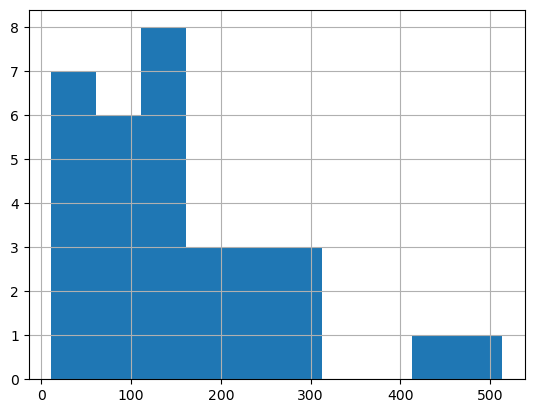

In [67]:
mean_every_5_rows = df_from_dict['test_200000'].rolling(window=5).mean()
means_every_5_rows = mean_every_5_rows[4::5].reset_index(drop=True)
(abs(means_every_5_rows - mean_vect[0])).hist()


In [20]:
df_from_dict

,test_200000,test_400000,test_800000,test_1600000,test_3200000
0,42926,81508,162087,325784,653420
1,40743,81474,162453,325993,660192
2,41083,82536,162568,325782,654851
3,40941,82571,163022,327609,651715
4,40631,82199,162569,325729,656203
...,...,...,...,...,...
155,40757,81894,163163,327188,656012
156,40626,81488,163267,325470,653811
157,40613,81311,165311,324962,657030
158,40390,81170,164309,325814,651006
